# Using PCA to predict Bearing Failure

In [2]:
import pandas as pd

df = pd.read_csv("bearings.csv", index_col=0, parse_dates=[0])
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


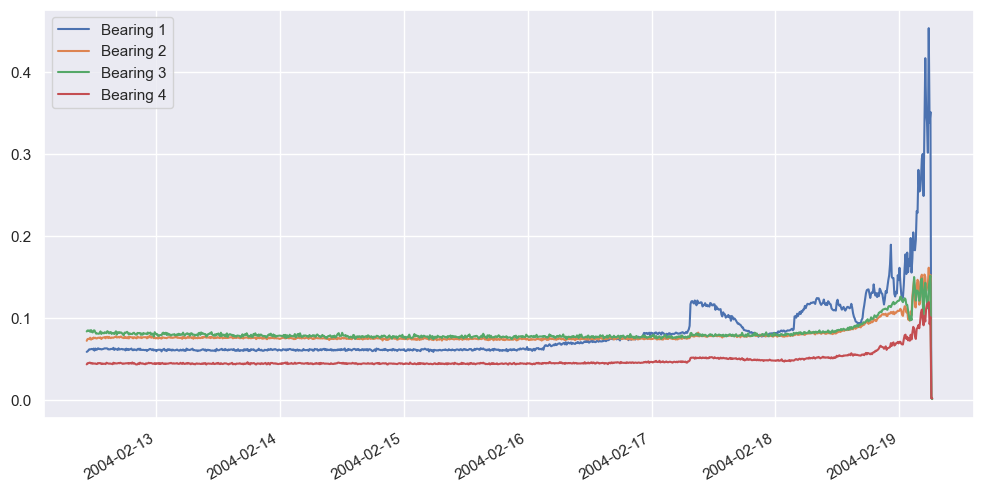

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df.plot(figsize=(12, 6));

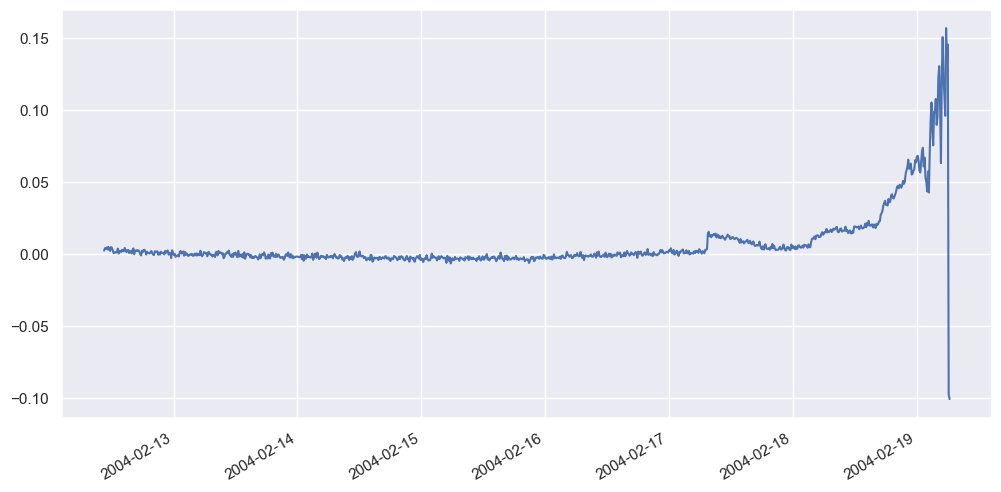

In [7]:
from sklearn.decomposition import PCA

X_train = df["2004-02-12 10:32:39":"2004-02-13 23:42:39"]
X_test = df["2004-02-13 23:52:39":]

pca = PCA(n_components=1, random_state=0)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), index=X_train.index)
X_test_pca = pd.DataFrame(pca.transform(X_test), index=X_test.index)

df_pca = pd.concat([X_train_pca, X_test_pca])
df_pca.plot(figsize=(12, 6))
plt.legend().remove();

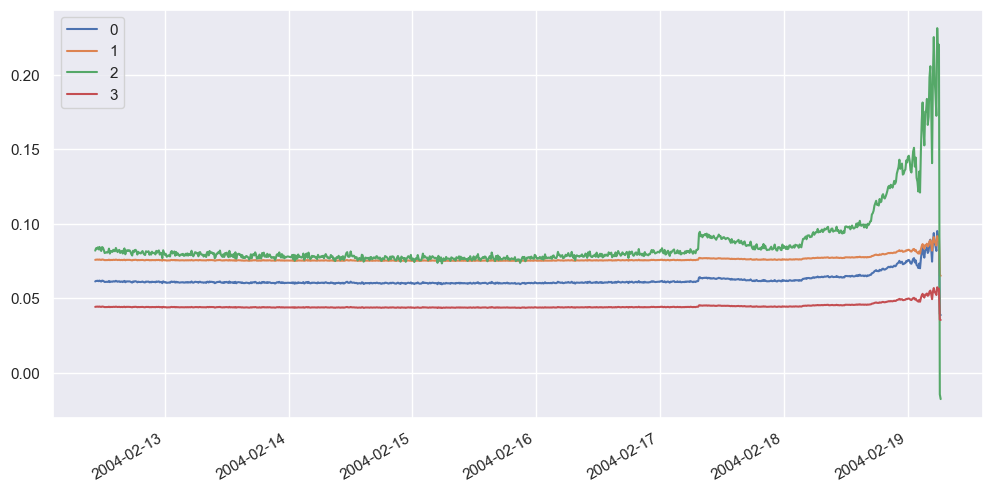

In [9]:
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index)
df_restored.plot(figsize=(12, 6));

<Axes: >

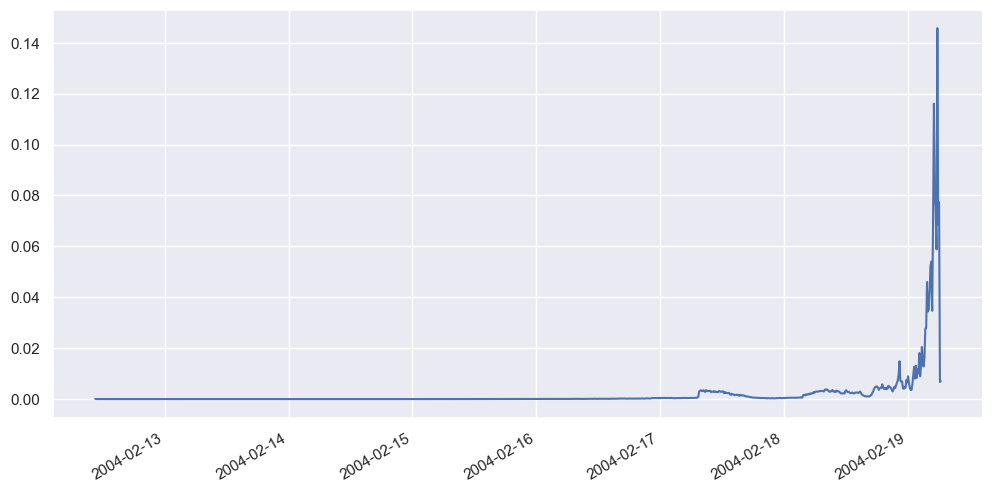

In [10]:
import numpy as np


def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss


scores = get_anomaly_scores(df, df_restored)
scores.plot(figsize=(12, 6))

In [15]:
def is_anomaly(row, pca, threshold):
    pca_row = pca.transform(row)
    restored_row = pca.inverse_transform(pca_row)
    losses = np.sum((row - restored_row) ** 2, axis=0)

    for loss in losses:
        if loss > threshold:
            return True

    return False

In [16]:
# Apply to a row early in the time series aathat represents normal behaviour.
x = df.loc[["2004-02-16 22:52:39"]]
is_anomaly(x, pca, 0.002)

False

In [17]:
x = df.loc[["2004-02-18 22:52:39"]]
is_anomaly(x, pca, 0.002)

True

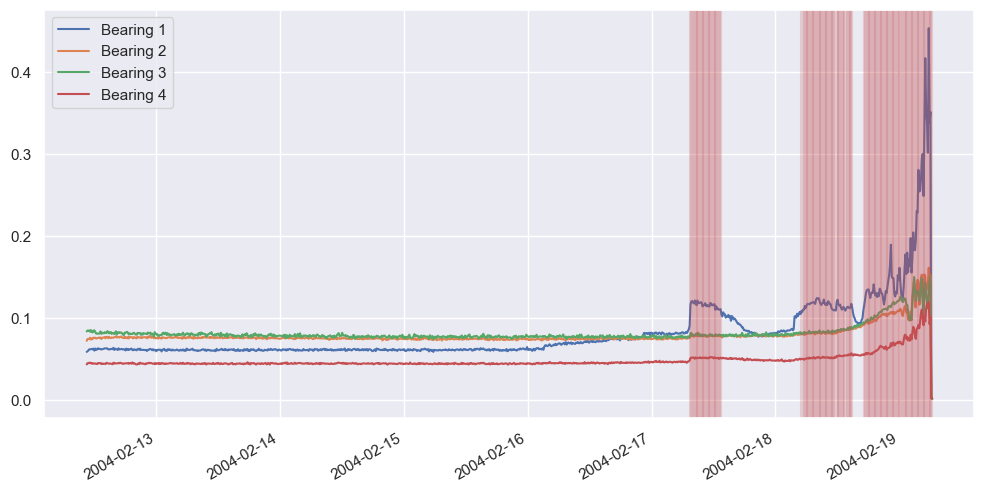

In [20]:
df.plot(figsize=(12, 6))


for index, row in df.iterrows():
    if is_anomaly(pd.DataFrame([row]), pca, 0.002):
        plt.axvline(row.name, color="r", alpha=0.2)

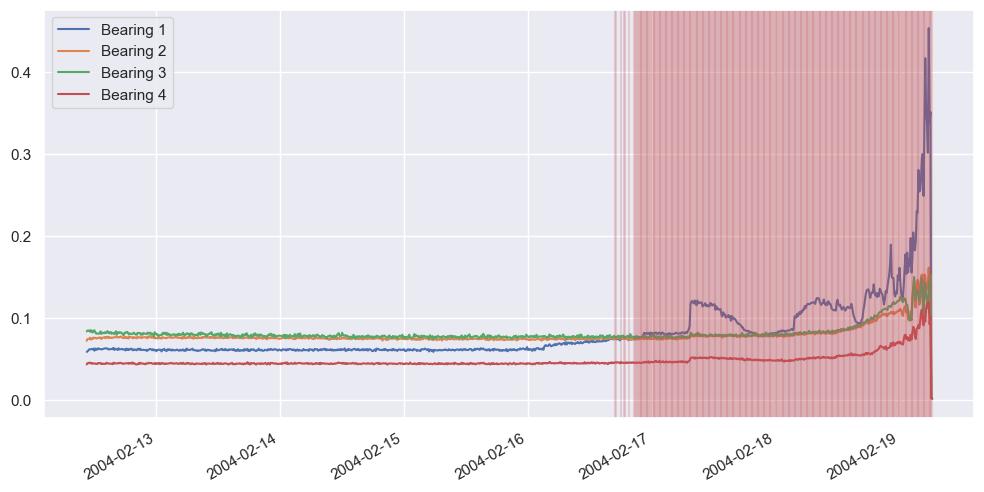

In [21]:
df.plot(figsize=(12, 6))


for index, row in df.iterrows():
    if is_anomaly(pd.DataFrame([row]), pca, 0.0002):
        plt.axvline(row.name, color="r", alpha=0.2)